In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
import random
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# import matplotlib.patches as patches

# from config import api_key

In [14]:
# Import file to df

# Store filepath in a variable
pitch_datapath = "Resources/pitch_data.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
pitch_data_df = pd.read_csv(pitch_datapath, encoding="ISO-8859-1")

# Show just the header
pitch_data_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [16]:
# Checking that all the fields have data
pitch_data_df.count()

Umpire                4688
Game_ID               4688
Home/Away             4688
Called Ball/Strike    4688
Pitch_X               4688
Pitch_Y               4688
Pitcher_Hand          4688
Batter_Hand           4688
Pitch_Type            4688
Pitch_Speed           4688
dtype: int64

In [23]:
# separate out balls and strikes
strikes = pitch_data_df.loc[pitch_data_df["Called Ball/Strike"] == "Strike"]
# strikes.head()

balls = pitch_data_df.loc[pitch_data_df["Called Ball/Strike"] == "Ball"]
# balls.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
5,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,-88,65,L,R,FA,90.0
8,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,0,-104,L,R,SL,78.0
9,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-47,100,R,R,FA,95.0
11,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-123,0,R,R,FA,95.0


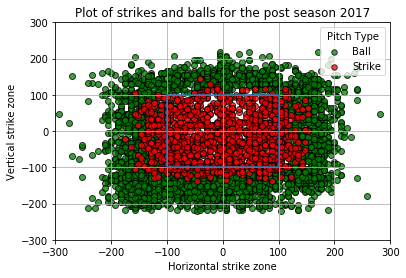

In [33]:
# CHART VALUES
# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b = balls["Pitch_X"]
y_axis_b = balls["Pitch_Y"]
x_axis_s = strikes["Pitch_X"]
y_axis_s = strikes["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b, y_axis_b, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls.png", bbox_inches="tight")

In [ ]:
# Show plot
plt.show()

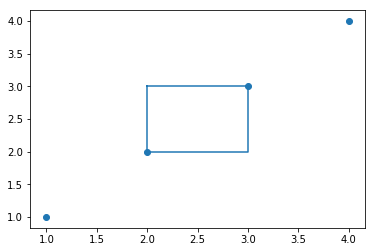

In [7]:
a = [1, 2, 3, 4]
b = [1, 2, 3, 4]
x = [2, 2, 3, 3, 2]
y = [3, 2, 2, 3, 3]

plt.scatter(x=a, y=b)
plt.plot(x, y)
plt.show()